# <center> Resampling

## <center>Objectives

#### <center>Be able to use Numpy to generate random data, create sample data from distributions, and resample data.

#### <center>Understand some applications of resampling including bootstrap and jacknife methods.

## First, some basic operations

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

Generate a random value from the standard normal distribution

In [2]:
data1 = np.random.normal()
data1

0.4021459790789671

Generate 5 random values from the normal distribution

In [4]:
data2 = np.random.normal(size=5)
data2

array([-0.60348056,  1.26370021,  0.75912846,  0.84302979,  0.42541077])

Generate 5 random values from a normal distribution with a mean of 4 and a standard deviation of 2.

In [5]:
data3 = np.random.normal(loc=4, scale=2, size=5)
data3
#loc is the mean
#scale is the std
#size is the number of points

array([6.22388769, 7.37023893, 3.64673762, 6.89255244, 0.40196279])

Generate 5 random values between 50 and 70 with equal probabilities.

In [6]:
data4 = np.random.uniform(low=50, high=70, size=5)
data4
#uniform for equal probabilities

array([69.38472503, 54.75595892, 51.62654306, 58.36582611, 67.21935373])

Generate 5 random integers between 1 and 100.

In [9]:
np.random.seed(4) #allows for reproducible results
data5 = np.random.randint(low=1, high=100, size=5)
data5

array([47, 56, 70,  2, 88])

Generate the same 5 random integers.

In [10]:
np.random.seed(4) #allows for reproducible results, needs to be in the same cell for jupyter notebooks
data5 = np.random.randint(low=1, high=100, size=5)
data5

array([47, 56, 70,  2, 88])

Pick 5 values from a list with replacement.

In [13]:
x = [3,4,7,4,3,8,1,3,5]
data6 = np.random.choice(x,5,replace=True) #choice allows for the passing in of a list
data6

array([8, 8, 1, 1, 5])

Pick 5 values from a list without replacement.

In [14]:
data7 = np.random.choice(x,5,replace=False)
data7

array([3, 3, 4, 5, 4])

Pick 5 values from a list with probability weights.

In [15]:
data8 = np.random.choice(x,5,p=[0.1, 0.2, 0.1, 0.3, 0.4, 0.1, 0.7, 0.2, 0.3])
data8

ValueError: probabilities do not sum to 1

Shuffle the order of an array.

In [21]:
np.random.shuffle(x)

Generate 10 samples of 5 elements each of an array.

In [19]:
data10 = np.random.choice(x,(10,5))
data10

array([[1, 4, 1, 8, 7],
       [3, 4, 8, 3, 7],
       [3, 8, 8, 7, 8],
       [5, 4, 1, 5, 3],
       [4, 3, 5, 3, 3],
       [8, 1, 3, 3, 3],
       [3, 3, 4, 5, 3],
       [7, 4, 3, 8, 3],
       [3, 3, 1, 4, 5],
       [3, 4, 4, 3, 1]])

## <center>Bootstrap

## First with normal data

In [22]:
n=1000
mu = 50
sigma = 5
x = np.random.normal(loc=mu, scale=sigma, size=n)

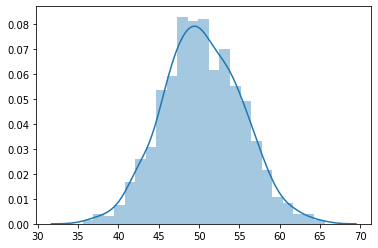

In [24]:
sns.distplot(x);

In [25]:
x_bar = 60

In [26]:
1-stats.norm(mu,sigma).cdf(x_bar)

0.02275013194817921

In [27]:
#creating the repitions for the choice of samples
reps = 10000
bootstrap_samples = np.random.choice(x, (n,reps))

In [28]:
np.mean([len(np.where(x>x_bar)[0])/reps for x in bootstrap_samples])
#np.where(x>x_bar) checks if values are greater than defined thresehold
#/reps takes the average of all sample input

0.024984499999999996

## Now with non-parametric data

Using the bootstrap method helps avoid type 1 errors

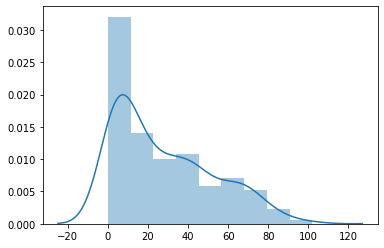

In [29]:
x = np.concatenate([np.random.exponential(15,size=200), np.random.normal(50,20,size=100)])
sns.distplot(x);

In [30]:
x_bar = 80
1-stats.norm(x.mean(),x.std()).cdf(x_bar)

0.016701607295616427

In [31]:
reps = 10000
bootstrap_samples = np.random.choice(x, (n,reps))

In [94]:
bootstrap_samples

array([[35.32195802,  1.24361465, 80.02282217, ..., 51.4628572 ,
         3.42400888, 11.54576642],
       [22.28715424, 45.36604946,  2.87731969, ..., 35.63435041,
         0.59216712, 56.76910193],
       [67.11705404, 73.34097958, 60.91906531, ...,  7.31727574,
        21.17075057, 31.9662881 ],
       ...,
       [75.27540966, 39.86623916,  5.87025952, ..., 34.7901672 ,
        34.7901672 ,  4.48052371],
       [59.55317733, 53.56973349,  2.87495515, ..., 22.69661991,
         7.19977733, 21.99238251],
       [16.31886457, 42.85829925,  5.57602964, ...,  5.55267746,
        45.85952231, 71.58858607]])

In [32]:
np.mean([len(np.where(x>x_bar)[0])/reps for x in bootstrap_samples])

0.0300658

## Bootstrap confidence intervals around mean

In [33]:
bootstrap_mean = bootstrap_samples.mean(axis=0)
l_i, u_i = np.percentile(bootstrap_mean, [2.5, 97.5]) #divide for the two tails this example is for 95% confidence
l_i, u_i

(26.475128574589416, 29.471349590951856)

In [34]:
x.mean()-l_i, u_i-x.mean()

(1.4938836525409656, 1.502337363821475)

In [35]:
norm_li, norm_ui = stats.norm.interval(0.95, loc=np.mean(x), scale=np.std(x))
norm_li, norm_ui

(-19.971339023563022, 75.90936347782379)

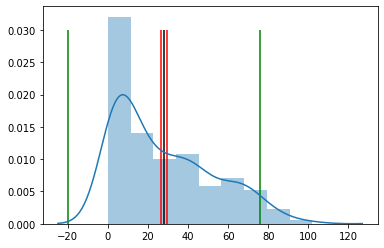

In [36]:
sns.distplot(x)
plt.vlines(x.mean(),0, 0.03)
plt.vlines(l_i, 0, 0.03, colors='r');plt.vlines(u_i, 0, 0.03, colors='r') #bootstrp method
plt.vlines(norm_li, 0, 0.03, colors='g');plt.vlines(norm_ui, 0, 0.03, colors='g'); #normal method for confidence intervals

## <center> Jackknife

The bootstrap method is the most widely used resampling method but it isn't the only one. Another resampling method is the jackknife method. The jackknife method generates additional samples by creating multiple copies of the original data, each missing one of the original data points. <br> <br>
For example, say we have [1,2,3,4] as our data. Using the jackknife method, our generated samples would be: [1,2,3], [2,3,4], [1,3,4], and [1,2,4]. 

# <center> Activity

Your task is to first create a <b> jackknife </b> function that will take an array of data and return a list of resampled arrays through the jackknife method. <br><br>
Then, create both a normal and non-normal sample. <br><br>
For each sample, using a normal distribution first and then the resampling distribution:
 - Choose an extreme value and calculate the p-value for it.
 - Calculate the 95% confidence interval around the mean. <br>
 
#### Discuss
What are the advantages and disadvantages for the bootstrap method v.s. jackknife method?

In [66]:
def jackknife(x):
    z = []
    x = list(x)
    for i in range(0, len(x)):
        y = x.copy()
        y.remove(x[i])
        z.append(y)
    return z

In [79]:
def jackknife_n(x):
    z = []
    x = list(x)
    for i in range(0, len(x)):
        y = x.copy()
        y.remove(x[i])
        z.append(y)
        k = np.array(z)
    return k

In [80]:
x = [1, 2, 3, 4]
jackknife(x)

array([[2, 3, 4],
       [1, 3, 4],
       [1, 2, 4],
       [1, 2, 3]])

In [83]:
n=1000
mu = 50
sigma = 5
x = np.random.normal(loc=mu, scale=sigma, size=n)
sample = jackknife(x)
sample

array([[48.8863181 , 44.9857859 , 51.65527557, ..., 41.37143501,
        49.50764982, 48.48566704],
       [49.50247822, 44.9857859 , 51.65527557, ..., 41.37143501,
        49.50764982, 48.48566704],
       [49.50247822, 48.8863181 , 51.65527557, ..., 41.37143501,
        49.50764982, 48.48566704],
       ...,
       [49.50247822, 48.8863181 , 44.9857859 , ..., 57.07324168,
        49.50764982, 48.48566704],
       [49.50247822, 48.8863181 , 44.9857859 , ..., 57.07324168,
        41.37143501, 48.48566704],
       [49.50247822, 48.8863181 , 44.9857859 , ..., 57.07324168,
        41.37143501, 49.50764982]])

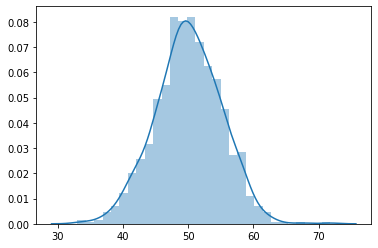

In [85]:
sns.distplot(sample[0])

In [86]:
#p-value for extreme value in normal distribution
x_bar = 62
1-stats.norm(mu,sigma).cdf(x_bar)

0.008197535924596155

In [111]:
#CI for normal
norm_li, norm_ui = stats.norm.interval(0.95, mu, sigma)
norm_li, norm_ui

(40.200180077299734, 59.799819922700266)

In [110]:
#p-value for jackknife
mean = sample.mean(axis=0)
std = sample.std(axis=0)
1-stats.norm(mean.mean(), std.std()).cdf(x_bar)

6.335307833893467e-10

In [95]:
#CI for jackknife
jackknife_mean = sample.mean(axis=0)
l_i, u_i = np.percentile(jackknife_mean, [2.5, 97.5]) #divide for the two tails this example is for 95% confidence
l_i, u_i

(42.16375319635121, 57.863408269646044)

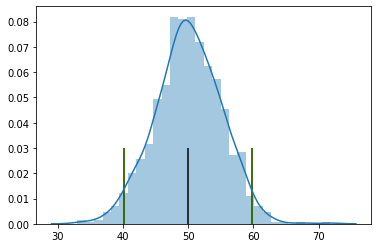

In [112]:
sns.distplot(x)
plt.vlines(x.mean(),0, 0.03)
plt.vlines(l_i, 0, 0.03, colors='r');plt.vlines(u_i, 0, 0.03, colors='r') #jackknife method
plt.vlines(norm_li, 0, 0.03, colors='g');plt.vlines(norm_ui, 0, 0.03, colors='g'); #normal method for confidence intervals